# Introduction to Inverse Problems

---

> Author: <font color='#f78c40'>Samuel Farrens</font>    
> Year: 2018  
> Email: [samuel.farrens@cea.fr](mailto:samuel.farrens@cea.fr)  
> Website: <a href="https://sfarrens.github.io" target="_blank">https://sfarrens.github.io</a>

---

## Contents
 
1. [Set-Up](#Set-Up)
1. [Introduction](#Introduction)
 * [Objective](#Objective)
 * [Inverse Problem Definition](#Inverse-Problem-Definition)
1. [Linear Regression](#Linear-Regression)
 * [Mathematical Representation](#Mathematical-Representation)
 * [Straight Line Example](#Straight-Line-Example)
1. [Linear Regression Exercise](#Linear-Regression-Exercise)
 * [Equation of a Polynomial Line](#Equation-of-a-Polynomial-Line)
1. [Gradient Descent](#Gradient-Descent)
 * [L2 Norm](#L2-Norm)
 * [Linear Regression Application](#Linear-Regression-Application)
1. [Gradient Descent Exercise](#Gradient-Descent-Exercise)
1. [Hints](#Hints)

---

## Set-Up

Here we will import a couple of packages that will be needed throughout the notebook. 

Users new to Jupyter notebooks should note that cells are executed by pressing <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> (&#x21E7;+ &#x23ce;). See <a href="https://jupyter-notebook.readthedocs.io/en/stable/" target_="blanck">here</a> for more details

In [1]:
# Import the numpy package with the alias np.
import numpy as np           

# Import interactive widgets.
from ipywidgets.widgets import interact, IntSlider

# Import tutorial plotting functions.
from sparsity_tutorial import plot

> Note that the plotting routines have been abstracted to keep the code cells as simple as possible. You can run
>  ```python
>  help(plot)
>  ```
> to see the expected inputs for these routines.

---

## Introduction

### <font color='blue'>Objective</font>

The objective of this notebook is to introduce the concept of an inverse problem. The focus will be on linear inverse problems, which are those that can be modelled using linear algebra.

### <font color='blue'>Inverse Problem Definition</font>

A standard "forward" problem is one in which data are obtained from model parameters, *i.e.*

$$\text{Model}\rightarrow\text{Data,}$$

while an inverse problem is one in which the model parameters are determined from the data, *i.e.*

$$\text{Data}\rightarrow\text{Model.}$$

In other words, with an inverse problem one attempts to obtain information about a physical system from observed measurements. This can be very useful as some model parameters can not be measured directly.

Inverse problems have been applied to various topics such as oceanography, weather prediction, astrophysics, medical imaging and geophysics.

See the following links for more information about inverse problems.
* [Wikipedia](https://en.wikipedia.org/wiki/Inverse_problem)
* [Scatting Ideas](https://cmontalto.wordpress.com/2013/03/08/what-are-inverse-problems/)


---

## Linear Regression

One of the simplest and most intuitive applications of an inverse problem is fitting a line to a set of data points. 

### <font color='blue'>Mathematical Representation</font>

We will start by defining some variables. We will use $y \in \mathbb{R}^{m}$ to represent data measurements/observations, $a \in \mathbb{R}^{n}$ to represent a given model and $H \in \mathbb{R}^{m \times n}$ to represent a matrix of equations that relate the model parameters to the measured data. Now we can pose a linear inverse problem of the following form

$$y = Ha$$

When dealing with forward problems $a$ and $H$ are known and can be used to obtain $y$. For inverse problems $y$ and $H$ are known and can be used to obtain $a$.

> Note: Here we use $a$ for our model vector to avoid confusion with data points on the $x$-axis. Commonly (and in the other tutorials) the model vector will be represented by the variable $x$.

### <font color='blue'>Straight Line Example</font>  

The best place to start is with something that should be intimately familiar to anyone with even the most basic background in mathematics, a straight line.


#### Equation of a Straight Line

A simple straight line can be represented with the following well known equation

$$y = mx + b$$

where $m$ is the gradient or slope of the line and $b$ is the point where the line intercepts the $y$-axis. In Python we can implement the following function to represent this equation.

In [2]:
# This defines a function called y_func with input variables x, m and b, and returns the values of mx + b.
def y_func(x, m, b):
    
    return m * x + b

#### Forward Problem

A straightforward way to approach this problem is, when we have some data on the x-axis

$$x = \begin{bmatrix} 8 & 2 & 11 & 6 & 5 & 4 & 12 & 9 & 6 & 11 \end{bmatrix}$$

and we know the slope and intercept of the line,

$$m = -1.1$$

$$b = 14,$$

to simply plug this information into the equation above to get the corresponding data on the y-axis. To think of the of this in terms of a linear forward problem, however, we need to know that the slope and intercept correspond to our model parameters and the data on the x-axis need to be converted into a matrix operator. So, a better way of representing our line equation would be:

$$y = a_0x^0 + a_1x^1$$

Then, in terms of our forward problem formulation ($y=Ha$), 

$$a = \begin{bmatrix} a_0 & a_1 \end{bmatrix} = \begin{bmatrix} 14 & -1.1 \end{bmatrix}$$

and

$$H = \begin{bmatrix} x^0 & x^1 \end{bmatrix} = \begin{bmatrix} 
1 & 8 \\
1 & 2 \\
1 & 11 \\
1 & 6 \\
1 & 5 \\
1 & 4 \\ 
1 & 12 \\
1 & 9 \\
1 & 6 \\
1 & 1 
\end{bmatrix}$$

We can implement this in python as follows. First we define $a$ and $H$ 

In [3]:
# Set points in x-axis.
x = np.array([8, 2, 11, 6, 5, 4, 12, 9, 6, 1])

# Define the H matrix operator.
H = np.array([np.ones(x.size), x]).T

# Set the model values.
a = np.array([14.0, -1.1])

then we can use these values to determine $y$.

> Note that the `@` operator in the following cell is equivalent to [`np.matmul`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) or [`np.dot`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).

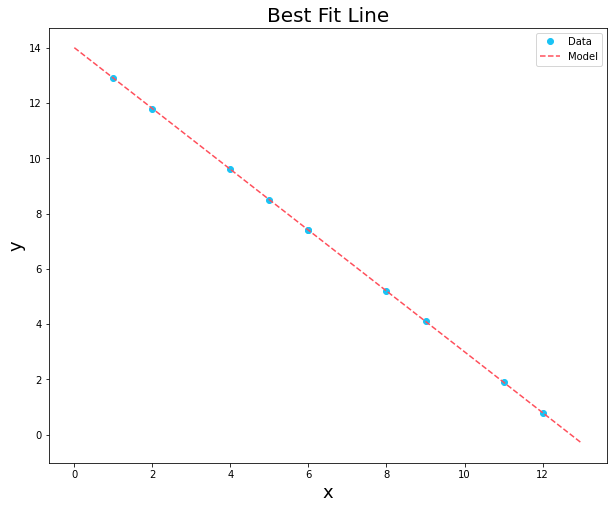

In [4]:
# Calculate Y.
y = H @ a  

# Plot results.            
plot.regression_plot(data=(x, y), model=(np.arange(14), y_func(np.arange(14), a[1], a[0])))

As our data has been produced using the model, the fit is perfect.

#### Inverse Problem

For the inverse problem we will assume we already know $y$ and use this to work out $a$. So, in other words, we already have a set of data points, $(x, y)$, and we want to work out the model parameters, $a$, of the best fitting line.

$$x = \begin{bmatrix} 8 & 2 & 11 & 6 & 5 & 4 & 12 & 9 & 6 & 1 \end{bmatrix}$$

$$y = \begin{bmatrix} 3 & 10 & 3 & 6 & 8 & 12 & 1 & 4 & 9 & 14 \end{bmatrix}$$

The matrix $H$ remains unchanged

$$H = \begin{bmatrix} 
1 & 8 \\
1 & 2 \\
1 & 11 \\
1 & 6 \\
1 & 5 \\
1 & 4 \\ 
1 & 12 \\
1 & 9 \\
1 & 6 \\
1 & 1 
\end{bmatrix}$$

but, to solve this problem, we need to invert $H$ *i.e.*

$$a = H^{-1}y$$

however, $H$ is not a square matrix, which means it cannot be inverted directly. So, first we need to multiply by $H^{T}$.

> Because $H \in \mathbb{R}^{m \times n}$ and $H^{T} \in \mathbb{R}^{n \times m}$ so $H^{T}H \in \mathbb{R}^{n \times n}$

So, the solution is

$$a = (H^TH)^{-1}H^{T}y$$

which is often called the <a href="http://mathworld.wolfram.com/NormalEquation.html" target_="blank">Normal Equation</a>. We can implement this in python as follows.

In [5]:
# This function implements the normal equation
def normal_eq(H, y):
    
    return np.linalg.inv(H.T @ H) @ H.T @ y

With this function we can attempt to fit a line to our data.

a = [14.08108108 -1.10641892]


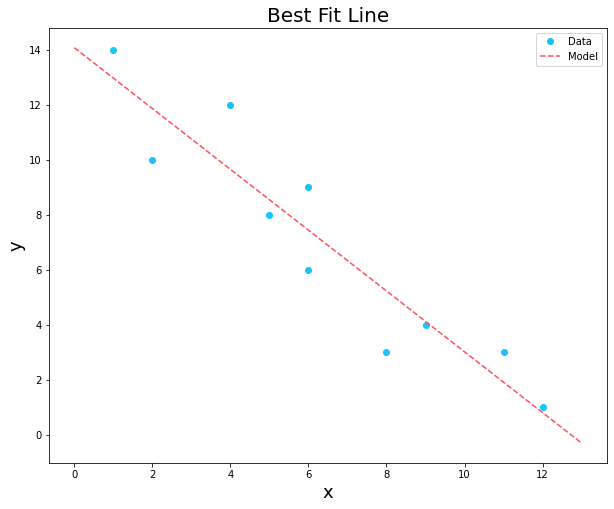

In [6]:
# Set points in y-axis.
y = np.array([3, 10, 3, 6, 8, 12, 1, 4, 9, 14])

# Find model parameters.
a = normal_eq(H, y)

print('a =', a)

# Plot results.
plot.regression_plot(data=(x, y), model=(np.arange(14), y_func(np.arange(14), a[1], a[0])))

As you can see we can easily recover a good fit to the data points with only a few lines of code.

## Linear Regression Exercise

For this exercise you should apply the techniques learned for fitting a straight line to a set of data points to a new set of data that requires a polynomial fit.

### <font color='blue'>Equation of a Polynomial Line</font>  

The expression for a straight line (*i.e.* $k = 1$) generalises to the following form for a $k^{\textrm{th}}$ degree polynomial:

$$y = a_0 + a_1x + a_2x^2 + ... + a_kx^k$$

where $a_i$ are the polynomial coefficients. We can represent this in Python with the following function:

In [7]:
# Define the new function y(x) for any kth degree polynomial.
# This defines a function called y_func2 with input variables x and a, and returns the values 
# of a0 + a1x + a2x^2 + ...
def y_func2(x, a):
    
    return sum([(a_i * x ** i) for i, a_i in enumerate(a)])

The data for this exercise are the following:

| x    | y     |
|:----:|:-----:|
| 0.00 | 0.486 | 
| 0.05 | 0.866 | 
| 0.10 | 0.944 | 
| 0.15 | 1.144 | 
| 0.20 | 1.103 | 
| 0.25 | 1.202 | 
| 0.30 | 1.166 |
| 0.35 | 1.191 | 
| 0.40 | 1.124 | 
| 0.45 | 1.095 | 
| 0.50 | 1.122 |
| 0.55 | 1.102 |
| 0.60 | 1.099 |
| 0.65 | 1.017 |
| 0.70 | 1.111 |
| 0.75 | 1.117 |
| 0.80 | 1.152 |
| 0.85 | 1.265 |
| 0.90 | 1.380 |
| 0.95 | 1.575 |
| 1.00 | 1.857 |

These values have already been defined for you.

In [8]:
# The values for x and y.
x_k = np.linspace(0.0, 1.0, 21)
y_k = np.array([
    0.486, 0.866, 0.944, 1.144, 1.103, 1.202, 1.166, 
    1.191, 1.124, 1.095, 1.122, 1.102, 1.099, 1.017, 
    1.111, 1.117, 1.152, 1.265, 1.380, 1.575, 1.857
])

Your job is to define the matrix operator $H$ and find the model parameters $a$ by solving the inverse problem $y=Ha$.

### <font color='red'>EXERCISE</font>  

Modify the cell below.

In [9]:
##############################
# YOU NEED TO EDIT THIS CELL #
##############################

# Define the matrix operator X here:
H_k = None

# Calculate the model parameters A here:
a_k = None

Now you can test how well your model line fits the data.

In [10]:
# Display the plot.
if a_k is not None:
    plot.regression_plot(data=(x_k, y_k), model=(x_k, y_func2(x_k, a_k)))

## Gradient Descent

In the previous examples we used an analytical approach to solve the inverse problem, however for many problems this is not possible (*e.g.* if the matrix $H$ is not invertable).

An alternative is to try an iterative method such as <a href="https://en.wikipedia.org/wiki/Gradient_descent" target_="blank">gradient descent</a>, which searches for the local optimum of a function from a given starting position.

For this approach we want to define a convex function that measures the accuracy of a given reconstruction. One way to test the accuracy is to measure the residual, $y-Hx$, for a given estimate of $x$. With a convex function, like the l2-norm, we will be searching for the global minimum of the residual

$$F(x) = \frac{1}{2}\|Hx-y\|_2^2$$

The corresponding gradient is

$$\nabla F(x) = H^{T}(Hx-y)$$

### <font color='blue'>L2 Norm</font>  

The l2 or Euclidian norm is calculated as follows:

$$\|x\|_2 = \Big(\sum_{i=1}^n|x_i|^2\Big)^{\frac{1}{2}}$$

We can show that this function is convex as follows. 

<br>
<font color='orange'>INTERACTIVE CELL</font>

In [11]:
######################################
# YOU SHOULD INTERACT WITH THIS CELL #
######################################

@interact(point=(0, 100, 1))
def show_grad(point=20):
    
    x = np.linspace(-1, 1, 101)
    x_norm = np.array([np.linalg.norm(x_i) for x_i in x])
    x_norm2 = np.array([np.linalg.norm(x_i) ** 2 for x_i in x])
    grad = x[point] ** 2 + 2 * x[point] * (x - x[point])

    print('Gradient =', grad[point])

    # Display
    plot.grad_plot(x, x_norm, x_norm2, grad, point)

interactive(children=(IntSlider(value=20, description='point'), Output()), _dom_classes=('widget-interact',))

The plot shows that both $\|x\|_2$ and $\|x\|_2^2$ have a clearly defined global minimum. The plot also displays the gradient of $\|x\|_2^2$ at the point $x_{20}$, try ajusting the position of this point and see what happens to the gradient.

Unsurprisingly, as the point apporachs the minimum the gradient tends to zero. Also, depending on which side of the minimum the point is, the gradient will be either positive or negative. Gradient descent captialises on this by iteratively updating solutions in the following way

$$x_{n+1} = x_n - \gamma \nabla F(x_n)$$

where $x_n$ corresponds to the solution at given iteration. So, as the gradient approaches zero and consequenly as $x$ approaches the global minimum the solution will converge. 

Now, we can try this apporach to out linear regression problem. 

### <font color='blue'>Linear Regression Application</font> 

The cost function for our problem is

$$F(a) = \frac{1}{2}\|Ha-y\|_2^2$$

where, as before, $a$ are the model parameters of the line we wish to fit. We can implement this as follows. 

In [12]:
# Cost function for linear regression problem
def cost_func(y, a, H):
    
    return 0.5 * np.linalg.norm(y - H @ a) ** 2

The gradient of this problem is given by

$$\nabla F(a) = H^{T}(Ha-y)$$

which can be implemented as follows.

In [13]:
# Gradient of linear regression problem
def grad(y, a, H):
    
    return H.T @ (H @ a - y)

The gradient descent algorithm is simply

$$a_{n+1} = a_n - \gamma \nabla F(a_n)$$

where $a_n$ is our current "guess" of the model parameters and $a_{n+1}$ are the updated values.

In [14]:
# Function that performs gradient descent.
def grad_desc(y, a_guess, H, grad, cost_func, gamma=None, n_iter=None):
    
    a_rec = a_guess
    cost = []
            
    for _ in range(n_iter):
        
        a_rec = a_rec - gamma * grad(y, a_rec, H)
        cost.append(cost_func(y, a_rec, H))
        
    return a_rec, cost

We can test this approach on our first straight line example.

<br>
<font color='orange'>INTERACTIVE CELL</font>

In [15]:
######################################
# YOU SHOULD INTERACT WITH THIS CELL #
######################################

@interact(n_iter=IntSlider(value=1, min=1, max=601, step=50))
def test_gradient_descent(n_iter):

    a_new, cost = grad_desc(y, [0, 0], H, grad, cost_func, gamma=0.003, n_iter=n_iter)
    
    plot.regression_plot(data=(x, y), model=(np.arange(14), y_func(np.arange(14), a_new[1], a_new[0])))
    plot.cost_plot(cost)

interactive(children=(IntSlider(value=1, description='n_iter', max=601, min=1, step=50), Output()), _dom_class…

You can clearly see how the model parameters are improved after each iteration and as the cost function converges we are left with a good fit to the data points.

## Gradient Descent Exercise

Apply the same gradient descent approach to the polynomial line data.

**Questions and tasks**

1. What is the cost function of this problem?
1. What is the gradient of this problem?
1. Plot your fit.
1. How many iterations did it take to get a reasonable fit?


### <font color='red'>EXERCISE</font>

Provide your solutions in the cell(s) below.

---

## <font color="orange">Hints</a>

**Linear Regression Exercise**

1. You do not need to redefine the function for the normal equation. 
1. The polynomial should have as many degrees as there are good Indiana Jones films. 

**Gradient Descent Exercise**

1. Make sure your first guess for $a$ has the right size.
1. If your cost function is increasing you may need to decrease the value of $\gamma$.
1. If your cost function is decreasing too slowly you may need to increase the value of $\gamma$.
1. Put as many iterations as needed to converge. It may be a lot!

[Open next notebook ->](./sparsity_1.ipynb)